# **Import libraries necessary**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


# **Start loading the dataset**

In [22]:
train=pd.read_csv("customer_churn_dataset-training-master.csv")
test=pd.read_csv("customer_churn_dataset-testing-master.csv")

In [23]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [24]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


# **Concat both training and testing datasets for easier preprocessing**

In [25]:
df = pd.concat([train, test], ignore_index=True)

In [38]:
# Check for missing values
print(df.isnull().sum())
# handling the missing values
df.dropna(inplace=True)

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


# **Identify numerical and categorical columns**

In [39]:
# Handle missing values manually
# For numerical columns, fill with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [40]:
# For categorical columns, fill with a placeholder value
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# **Manually encode data**


In [41]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)
df['Subscription Type'] = df['Subscription Type'].replace({'Standard': 0, 'Basic': 1, 'Premium': 2}).astype(int)
df['Contract Length'] = df['Contract Length'].replace({'Annual': 0, 'Monthly': 1, 'Quarterly': 2}).astype(int)

In [42]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [43]:
# Update numerical columns after dropping the target variable
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [44]:
# Preprocess numerical data
numerical_data = X[numerical_cols]
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Combine preprocessed numerical and encoded categorical data
categorical_data_encoded = X[categorical_cols].values
X_preprocessed = np.hstack([numerical_data_scaled, categorical_data_encoded])


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)


# **Model 01-> Decision Tree Classifier**

In [47]:
# Initializing Model
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [48]:
# Train model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Test Model
decision_tree_predictions = decision_tree_model.predict(X_test)

In [51]:
# Compute Metrics
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_f1_score = f1_score(y_test, decision_tree_predictions)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)

# Display Results
print("Decision Tree Performance:")
print(f"Accuracy: {decision_tree_accuracy * 100:.2f}%")
print(f"Recall: {decision_tree_recall * 100:.2f}%")
print(f"Precision: {decision_tree_precision * 100:.2f}%")
print(f"F1 Score: {decision_tree_f1_score * 100:.2f}%")

Decision Tree Performance:
Accuracy: 93.53%
F1 Score: 94.19%
Recall: 94.28%
Precision: 94.10%


# **Model 02-> k-Nearest Neighbors (k-NN)**

In [52]:
# Initializing Model
knn_model = KNeighborsClassifier()


In [53]:
# Train model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
# Test Model
knn_predictions = knn_model.predict(X_test)

In [55]:
# Compute Metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)

# Display Results
print("k-Nearest Neighbors (k-NN) Performance:")
print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Recall: {knn_recall * 100:.2f}%")
print(f"Precision: {knn_precision * 100:.2f}%")
print(f"F1 Score: {knn_f1_score * 100:.2f}%")

k-Nearest Neighbors (k-NN) Performance:
Accuracy: 91.95%
Recall: 95.67%
Precision: 90.43%
F1 Score: 92.97%


# **Model 03-> Logistic Regression**

In [56]:
# Initializing Model
logistic_regression_model = LogisticRegression()

In [57]:
# Train model
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Test Model
logistic_regression_predictions = logistic_regression_model.predict(X_test)

In [59]:
# Compute Metrics
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_f1_score = f1_score(y_test, logistic_regression_predictions)
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)

# Display Results
print("Logistic Regression Performance:")
print(f"Accuracy: {logistic_regression_accuracy * 100:.2f}%")
print(f"Recall: {logistic_regression_recall * 100:.2f}%")
print(f"Precision: {logistic_regression_precision * 100:.2f}%")
print(f"F1 Score: {logistic_regression_f1_score * 100:.2f}%")


Logistic Regression Performance:
Accuracy: 87.84%
Recall: 90.83%
Precision: 87.74%
F1 Score: 89.26%


# **Comparing the 3 different algorithm's results**

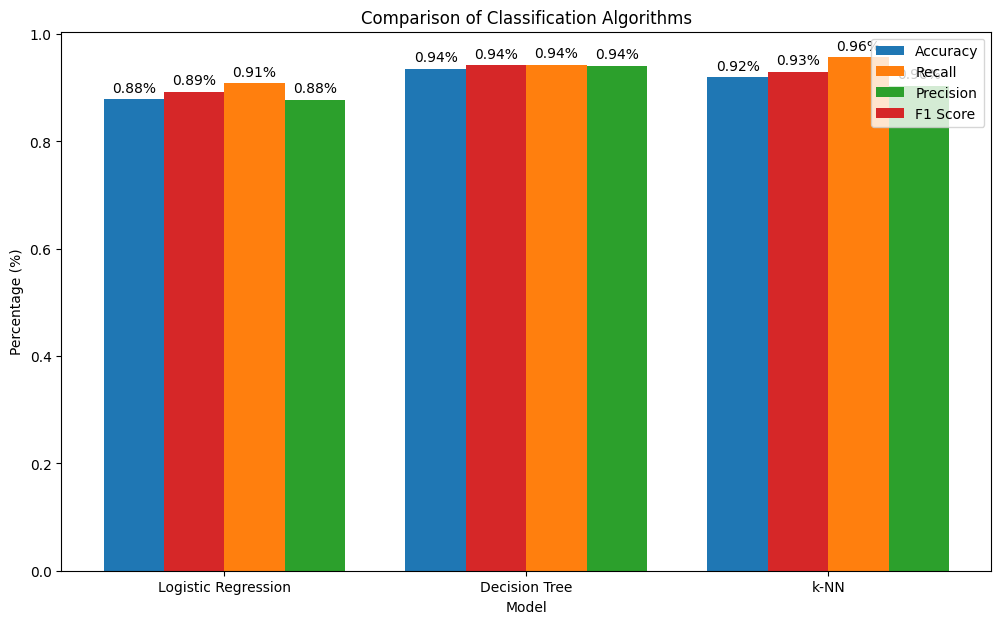

In [61]:
models = ['Logistic Regression', 'Decision Tree', 'k-NN']


accuracy = [logistic_regression_accuracy, decision_tree_accuracy, knn_accuracy]
recall = [logistic_regression_recall, decision_tree_recall, knn_recall]
precision = [logistic_regression_precision, decision_tree_precision, knn_precision]
f1_scores = [logistic_regression_f1_score, decision_tree_f1_score, knn_f1_score]


# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for each metric
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects3 = ax.bar(x + 1.5*width, precision, width, label='Precision')
rects4 = ax.bar(x - 0.5*width, f1_scores, width, label='F1 Score')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Classification Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply the function to all bars
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.show()